In [3]:
import pandas as pd

dataset=pd.read_csv('cardio_dataset.csv').values

data=dataset[:,:7]
target=dataset[:,7]

target=target.reshape(-1,1)

print(data[:5])
print(target[:5])

[[  2.  48. 236.  66.   0.   2.   0.]
 [  1.  48. 260.  51.   0.   2.   1.]
 [  1.  44. 187.  49.   1.   2.   0.]
 [  2.  42. 216.  57.   1.   2.   0.]
 [  2.  56. 156.  42.   0.   2.   0.]]
[[1.1]
 [7. ]
 [7. ]
 [0.4]
 [2.2]]


In [25]:
from sklearn.preprocessing import MinMaxScaler

data_scaler=MinMaxScaler(feature_range=(0,1))
target_scaler=MinMaxScaler(feature_range=(0,1))

data_scaled=data_scaler.fit_transform(data)
target_scaled=target_scaler.fit_transform(target)

print(data_scaled[:5])
print(target_scaled[:5])

[[1.         0.20512821 0.40045249 0.29347826 0.         1.
  0.        ]
 [0.         0.20512821 0.45475113 0.21195652 0.         1.
  1.        ]
 [0.         0.1025641  0.28959276 0.20108696 1.         1.
  0.        ]
 [1.         0.05128205 0.35520362 0.24456522 1.         1.
  0.        ]
 [1.         0.41025641 0.21945701 0.16304348 0.         1.
  0.        ]]
[[0.01172333]
 [0.08089097]
 [0.08089097]
 [0.003517  ]
 [0.02461899]]


In [26]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data_scaled,
                                                               target_scaled,
                                                               test_size=0.1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

model.add(Dense(16,input_dim=7,activation='relu'))
model.add(Dense(32,input_dim=16,activation='relu'))
model.add(Dense(16,input_dim=32,activation='relu'))
model.add(Dense(1,input_dim=16,activation='relu'))

model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [28]:
history=model.fit(train_data,train_target,epochs=100,validation_split=0.1)

Train on 5381 samples, validate on 598 samples
Epoch 1/100
5381/5381 [==============================] - 0s 73us/step - loss: 0.0087 - val_loss: 0.0043
Epoch 2/100
5381/5381 [==============================] - 0s 51us/step - loss: 0.0045 - val_loss: 0.0035
Epoch 3/100
5381/5381 [==============================] - 0s 47us/step - loss: 0.0038 - val_loss: 0.0034
Epoch 4/100
5381/5381 [==============================] - 0s 49us/step - loss: 0.0036 - val_loss: 0.0032
Epoch 5/100
5381/5381 [==============================] - 0s 47us/step - loss: 0.0035 - val_loss: 0.0030
Epoch 6/100
5381/5381 [==============================] - 0s 49us/step - loss: 0.0035 - val_loss: 0.0030
Epoch 7/100
5381/5381 [==============================] - 0s 49us/step - loss: 0.0033 - val_loss: 0.0030
Epoch 8/100
5381/5381 [==============================] - 0s 46us/step - loss: 0.0033 - val_loss: 0.0030
Epoch 9/100
5381/5381 [==============================] - 0s 47us/step - loss: 0.0033 - val_loss: 0.0028
Epoch 10/100
5381

5381/5381 [==============================] - 0s 40us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 79/100
5381/5381 [==============================] - 0s 43us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 80/100
5381/5381 [==============================] - 0s 43us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 81/100
5381/5381 [==============================] - 0s 44us/step - loss: 0.0026 - val_loss: 0.0027
Epoch 82/100
5381/5381 [==============================] - 0s 43us/step - loss: 0.0027 - val_loss: 0.0028
Epoch 83/100
5381/5381 [==============================] - 0s 41us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 84/100
5381/5381 [==============================] - 0s 45us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 85/100
5381/5381 [==============================] - 0s 44us/step - loss: 0.0027 - val_loss: 0.0027
Epoch 86/100
5381/5381 [==============================] - 0s 44us/step - loss: 0.0027 - val_loss: 0.0031
Epoch 87/100
5381/5381 [==============================] - 0s 43us/st

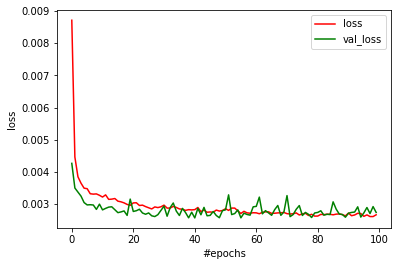

In [29]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='loss')
plt.plot(history.history['val_loss'],'g',label='val_loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.8588120845915522


In [31]:
print(test_target[:10].T)
print(result[:10].T)

[[0.06447831 0.01992966 0.007034   0.25791325 0.50293083 0.22860492
  0.01172333 0.03985932 0.38569754 0.13950762]]
[[0.03884934 0.01646243 0.0027428  0.2583337  0.39000887 0.1462979
  0.00848181 0.03379478 0.29007393 0.16991809]]


In [32]:
real_test_target=target_scaler.inverse_transform(test_target)
real_result=target_scaler.inverse_transform(result)

print('Actual Targets',real_test_target[:10].T)
print('Predicted Targets',real_result[:10].T)

Actual Targets [[ 5.6  1.8  0.7 22.1 43.  19.6  1.1  3.5 33.  12. ]]
Predicted Targets [[ 3.4138484   1.5042449   0.33396125 22.135866   33.367756   12.579211
   0.82349855  2.9826944  24.843306   14.594013  ]]
